In [1]:
import collections
import random

import matplotlib.pyplot as plt
import numpy as np
import tqdm
import matminer
import pymatgen.core, pymatgen.core.composition
import pymatgen.io.ase

import pandas as pd

In [2]:
RANDOM_SEED = 1234

pd.options.mode.chained_assignment = None
tqdm.tqdm.pandas()
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
df = pd.read_pickle("../DigitalEcosystem/raw_data/2d_mat_dataset_raw.pkl")
df = df.drop(columns=['2dm_id (unitless)',
                      'formula',
                      'discovery_process (unitless)',
                      'potcars (unitless)',
                      'is_hubbard (unitless)',
                      'energy_per_atom (eV)',
                      'decomposition_energy (eV/atom)',
                      'is_bandgap_direct (unitless)',
                      'is_metal (unitless)',
                      'energy_vdw_per_atom (eV/atom)'])
df

,atoms_object (unitless),exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
0,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...",0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,...,2.0,2.0,0.133,0.02770,147.0,146.0,171.0,284.0,2826.915883,0.557
1,"(Atom('Ba', [2.476683476681, 1.429910903420999...",0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,...,2.0,5.0,0.192,18.00000,206.0,247.0,252.0,370.3,1620.000000,6.600
2,"(Atom('Tl', [2.63896615613751, 10.292177253854...",0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,...,2.0,3.0,0.128,0.20500,180.0,189.0,215.0,403.5,818.000000,2.900
3,"(Atom('Mo', [1.5833675, 2.687975714894, 2.6388...",-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,...,1.0,3.0,0.251,0.00890,175.0,182.0,207.0,305.2,206.000000,2.180
4,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...",NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,...,2.0,2.0,0.133,0.02658,152.0,150.0,182.0,284.0,317.500000,0.802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,"(Atom('Bi', [6.537243774895211, 2.363799214670...",NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,...,2.0,5.0,0.124,3.00000,206.0,199.0,244.0,437.0,1790.000000,5.500
6347,"(Atom('Pt', [1.7596322562971602, 1.01592211741...",0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,1.0,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900
6348,"(Atom('Pt', [1.84215348881831, 1.0635655531000...",0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,...,1.0,4.0,0.133,0.52000,190.0,182.0,229.0,275.4,2680.000000,3.770
6349,"(Atom('Pt', [1.8200943700922698, 1.05082975916...",0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,1.0,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900


In [4]:
structures = df['atoms_object (unitless)'].apply(pymatgen.io.ase.AseAtomsAdaptor.get_structure)
df['ox_struct'] = structures.apply(lambda i: i.copy())
df.ox_struct.progress_apply(lambda struct: struct.add_oxidation_state_by_guess())
df

100%|██████████| 6351/6351 [04:58<00:00, 21.30it/s] 


,atoms_object (unitless),exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,...,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct
0,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...",0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,...,2.0,0.133,0.02770,147.0,146.0,171.0,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22...."
1,"(Atom('Ba', [2.476683476681, 1.429910903420999...",0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,...,5.0,0.192,18.00000,206.0,247.0,252.0,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [..."
2,"(Atom('Tl', [2.63896615613751, 10.292177253854...",0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,...,3.0,0.128,0.20500,180.0,189.0,215.0,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [..."
3,"(Atom('Mo', [1.5833675, 2.687975714894, 2.6388...",-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,...,3.0,0.251,0.00890,175.0,182.0,207.0,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0...."
4,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...",NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,...,2.0,0.133,0.02658,152.0,150.0,182.0,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,"(Atom('Bi', [6.537243774895211, 2.363799214670...",NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,...,5.0,0.124,3.00000,206.0,199.0,244.0,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [..."
6347,"(Atom('Pt', [1.7596322562971602, 1.01592211741...",0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [..."
6348,"(Atom('Pt', [1.84215348881831, 1.0635655531000...",0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,...,4.0,0.133,0.52000,190.0,182.0,229.0,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [..."
6349,"(Atom('Pt', [1.8200943700922698, 1.05082975916...",0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [..."


In [5]:
df = df.drop(columns=['atoms_object (unitless)'])

In [6]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.structure.misc import EwaldEnergy
from matminer.featurizers.structure.order import StructuralComplexity
from matminer.featurizers.structure.symmetry import GlobalSymmetryFeatures

struct_features = MultipleFeaturizer([
    EwaldEnergy(),
    StructuralComplexity(),
    GlobalSymmetryFeatures('n_symmetry_ops'),
])
df[struct_features.feature_labels()] = struct_features.featurize_many(df.ox_struct)
df

MultipleFeaturizer:   0%|          | 0/6351 [00:00<?, ?it/s]

,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,146.0,171.0,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,247.0,252.0,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,189.0,215.0,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,182.0,207.0,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,150.0,182.0,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,199.0,244.0,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,182.0,229.0,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12


In [7]:
import warnings
from matminer.featurizers.structure.bonding import GlobalInstabilityIndex
desc = GlobalInstabilityIndex()

def maybe_global_instability(struct):
    try:
        return desc.featurize(struct)[0]
    except:
        return None

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    df['global_instability']=df.ox_struct.progress_apply(maybe_global_instability)
df

100%|██████████| 6351/6351 [01:55<00:00, 54.88it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,171.0,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,252.0,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,215.0,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,207.0,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,182.0,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,244.0,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,215.0,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,229.0,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,215.0,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393


In [8]:
from pymatgen.analysis.local_env import JmolNN
neighbor_finder = JmolNN()

In [9]:
from matminer.featurizers.site.bonding import AverageBondLength

def average_bond_length(structure, featurizer = AverageBondLength(neighbor_finder)):
    n_atoms = len(structure)
    try:
        lengths = map(lambda i: featurizer.featurize(structure, i)[0], range(n_atoms))
        return sum(lengths) / n_atoms
    except IndexError:
        return None

df['bond_length_average'] = df.ox_struct.progress_apply(average_bond_length).copy()
df

100%|██████████| 6351/6351 [02:47<00:00, 37.90it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265


In [10]:
from matminer.featurizers.site.bonding import AverageBondAngle
def average_bond_angle(structure, featurizer = AverageBondAngle(neighbor_finder)):
    n_atoms = len(structure)
    try:
        angles = map(lambda i: featurizer.featurize(structure, i)[0], range(n_atoms))
        return sum(angles) / n_atoms
    except IndexError:
        return None
df['bond_angle_average'] = df.ox_struct.progress_apply(average_bond_angle).copy()
df

  0%|          | 0/6351 [00:00<?, ?it/s]/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/matminer/featurizers/site/bonding.py:250: RuntimeWarning: All-NaN slice encountered
  minimum_bond_angles = np.nanmin(bond_angles, axis=1)
100%|██████████| 6351/6351 [03:13<00:00, 32.84it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN,NaN
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722


In [11]:
def average_cn(structure, neighbor_finder = neighbor_finder):
    n_atoms = len(structure)
    cns = map(lambda i: neighbor_finder.get_cn(structure, i), range(n_atoms))
    return sum(cns) / n_atoms
df['average_cn'] = df.ox_struct.progress_apply(average_cn).copy()
df

100%|██████████| 6351/6351 [03:21<00:00, 31.50it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5


In [12]:
def ab_perimeter_area_ratio(structure):
    a, b, c = structure.lattice.matrix
    perimeter = 2*np.linalg.norm(a) + 2*np.linalg.norm(b)
    area = np.linalg.norm(np.cross(a,b))
    return perimeter / area
df['perimeter_area_ratio'] = df.ox_struct.progress_apply(ab_perimeter_area_ratio).copy()
df

100%|██████████| 6351/6351 [00:00<00:00, 16098.37it/s]


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn,perimeter_area_ratio
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0,1.312429
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0,0.932458
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5,0.668855
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0,0.996401
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0,1.463689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5,0.507262
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5,1.312435
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5,1.253643
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5,1.268837


In [13]:
def slab_thickness(structure):
    c_coords = structure.cart_coords[:,2]
    thickness = max(c_coords) - min(c_coords)
    return thickness
df['slab_thickness'] = df.ox_struct.progress_apply(slab_thickness).copy()
df

100%|██████████| 6351/6351 [00:00<00:00, 74734.38it/s]


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn,perimeter_area_ratio,slab_thickness
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0,1.312429,22.088712
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0,0.932458,20.883103
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5,0.668855,4.870394
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0,0.996401,3.714047
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0,1.463689,20.984761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5,0.507262,2.862880
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5,1.312435,4.283387
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5,1.253643,4.342862
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5,1.268837,3.781314


In [17]:
data = df.drop(columns=['ox_struct', 'bandgap (eV)', 'total_magnetization (Bohr Magneton)'])
data

,exfoliation_energy_per_atom (eV/atom),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,...,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn,perimeter_area_ratio,slab_thickness
0,0.234617,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,180.800000,85.000000,...,0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0,1.312429,22.088712
1,0.210645,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,3861.333333,189.666667,...,0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0,0.932458,20.883103
2,0.095794,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,324.500000,125.000000,...,-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5,0.668855,4.870394
3,-0.055818,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,408.066667,119.333333,...,-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0,0.996401,3.714047
4,NaN,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,185.133333,91.000000,...,-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0,1.463689,20.984761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,492.000000,143.000000,...,-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5,0.507262,2.862880
6347,0.113072,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,305.000000,120.500000,...,-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5,1.312435,4.283387
6348,0.125031,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,351.500000,128.000000,...,-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5,1.253643,4.342862
6349,0.108621,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,305.000000,120.500000,...,-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5,1.268837,3.781314


In [18]:
import tpot
import sklearn.model_selection
import sklearn.impute
imputer = sklearn.impute.KNNImputer(weights='distance')

data_train, data_test = sklearn.model_selection.train_test_split(data, test_size=0.25, random_state=RANDOM_SEED)
data_train = pd.DataFrame(imputer.fit_transform(data_train), columns=data_train.columns)
data_test = pd.DataFrame(imputer.transform(data_test), columns=data_test.columns)

In [21]:
data_train.to_csv("exfol_extraFeatures_kNNImputed_train.csv")
data_test.to_csv("exfol_extraFeatures_kNNImputed_test.csv")

target = 'exfoliation_energy_per_atom (eV/atom)'
x = data_train.drop(columns=[target]).to_numpy()
y = data_train[target].to_numpy()

In [23]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=10/60,
    max_time_mins=25,
    cv=5,
    verbosity=2,
    scoring="r2",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=8,
    random_state=RANDOM_SEED
)
model.fit(features=x, target=y)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.34498242196458934

Generation 2 - Current best internal CV score: 0.34498242196458934

Generation 3 - Current best internal CV score: 0.3453051240162389

Generation 4 - Current best internal CV score: 0.3487287115744264

Generation 5 - Current best internal CV score: 0.40362803895733135

Generation 6 - Current best internal CV score: 0.4089012020325978

Generation 7 - Current best internal CV score: 0.4089012020325978

Generation 8 - Current best internal CV score: 0.4089012020325978

Generation 9 - Current best internal CV score: 0.4089012020325978

25.13 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(StandardScaler(input_matrix), bootstrap=False, max_features=0.1, min_samples_leaf=6, min_samples_split=5, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

In [24]:
train_y_true = y
train_y_pred = model.predict(x)

test_x = data_test.drop(columns=[target]).to_numpy()
test_y = data_test[target].to_numpy()

test_y_true = test_y
test_y_pred = model.predict(test_x)

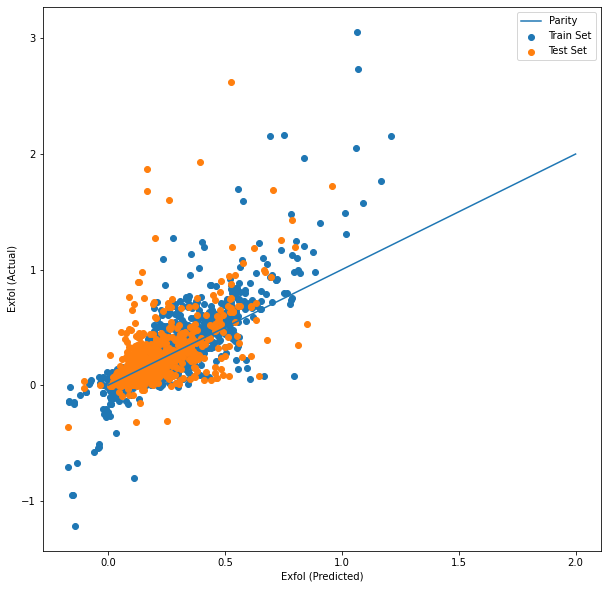

In [26]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(x=train_y_pred, y=train_y_true, label="Train Set")
plt.scatter(x=test_y_pred, y=test_y_true, label="Test Set")
plt.plot([0,2], [0,2], label="Parity")
plt.ylabel("Exfol (Actual)")
plt.xlabel("Exfol (Predicted)")
plt.legend()

In [29]:
tree=model.fitted_pipeline_[-1]

In [30]:
importances = zip(tree.feature_importances_, data_train.drop(columns=[target]).columns)

In [31]:
for i,j in sorted(importances, key=lambda i: -i[0]):
    print(i,j)

0.051406883573645305 max:num_p_valence
0.02815104860138752 min:boiling_point
0.0220747625319791 min:melting_point
0.02050286658101638 var:num_p_unfilled
0.02033351832891796 ave:num_p_valence
0.01828233889454889 min:evaporation_heat
0.013348558760736812 var:num_p_valence
0.01281745318357588 max:mendeleev_number
0.012542851045798142 min:thermal_conductivity
0.010874877021424605 ave:vdw_radius_alvarez
0.010647120997698373 ave:boiling_point
0.010136074675006703 ave:electron_negativity
0.009569147218529523 ave:en_ghosh
0.00948080630629294 ave:thermal_conductivity
0.00905292909689978 ave:evaporation_heat
0.008956508784966056 max:en_allen
0.008682657442645654 max:en_pauling
0.008443726740768076 ave:first_ion_en
0.008261738193586948 sum:electron_negativity
0.0077573626391517665 ave:num_p_unfilled
0.007626978169396702 ave:en_pauling
0.00752068064966938 sum:num_p_valence
0.007420360227950803 min:vdw_radius_alvarez
0.007225399200666798 ave:fusion_enthalpy
0.007162525953642958 average_cn
0.0070806

In [82]:
sisso_fun = (
    ("Rung1_1Term", lambda df: 9.416504816846741e-02 + 1.610701833162262e-03 * (df["min:evaporation_heat"] / df["min:electron_negativity"])),
    ("Rung1_2Term", lambda df: 7.889709146754061e-02 + 1.113430001456383e+00 * (df["var:num_p_unfilled"] / df["sum:num_valance"]) + 1.287409038211310e-03 * (df["min:evaporation_heat"] / df["min:electron_negativity"]))
)

for dataframe in (data_train, data_test):
    for name, fun in sisso_fun:
        dataframe[name] = fun(dataframe)

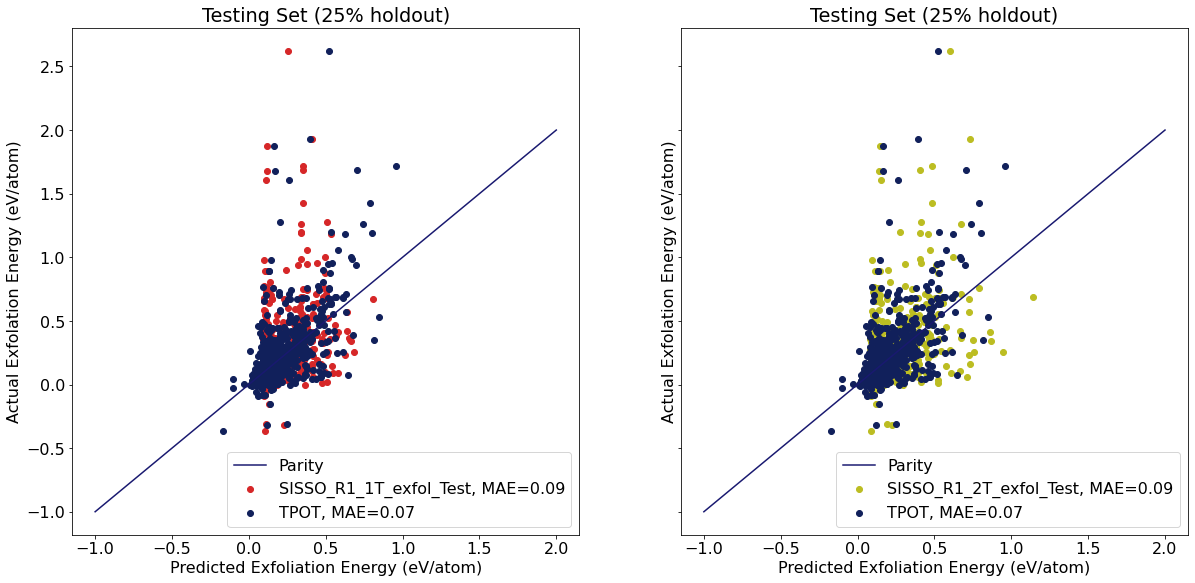

In [89]:
plt.rcParams["font.size"] = 16

tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=test_y_pred), 2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=data_test[sisso_fun[0][0]]),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=data_test[sisso_fun[1][0]]),2)


fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
ax1.scatter(y=data_test["exfoliation_energy_per_atom (eV/atom)"],  x=data_test[sisso_fun[0][0]], marker="o",   color="tab:red", label=f"SISSO_R1_1T_exfol_Test, MAE={r1_1t_mae}")
ax2.scatter(y=data_test["exfoliation_energy_per_atom (eV/atom)"],  x=data_test[sisso_fun[1][0]], marker="o",   color="tab:olive",label=f"SISSO_R1_2T_exfol_Test, MAE={r1_2t_mae}")

for ax in (ax1, ax2):
    ax.set_box_aspect(1)
    ax.plot([-1,2], [-1,2], c="midnightblue", label="Parity")
    ax.scatter(x=test_y_pred, y=test_y_true, color="#11205B", label=f"TPOT, MAE={tpot_mae}")
    ax.legend()
    ax.set_xlabel("Predicted Exfoliation Energy (eV/atom)")
    ax.set_ylabel("Actual Exfolation Energy (eV/atom)")
    ax.set_title("Testing Set (25% holdout)")
fig.set_size_inches(20,20)

In [43]:
[i for i in df.columns]

['exfoliation_energy_per_atom (eV/atom)',
 'total_magnetization (Bohr Magneton)',
 'bandgap (eV)',
 'ave:atomic_number',
 'ave:atomic_radius',
 'ave:atomic_radius_rahm',
 'ave:atomic_volume',
 'ave:atomic_weight',
 'ave:boiling_point',
 'ave:bulk_modulus',
 'ave:c6_gb',
 'ave:covalent_radius_cordero',
 'ave:covalent_radius_pyykko',
 'ave:covalent_radius_pyykko_double',
 'ave:covalent_radius_pyykko_triple',
 'ave:covalent_radius_slater',
 'ave:density',
 'ave:dipole_polarizability',
 'ave:electron_negativity',
 'ave:electron_affinity',
 'ave:en_allen',
 'ave:en_ghosh',
 'ave:en_pauling',
 'ave:first_ion_en',
 'ave:fusion_enthalpy',
 'ave:gs_bandgap',
 'ave:gs_energy',
 'ave:gs_est_bcc_latcnt',
 'ave:gs_est_fcc_latcnt',
 'ave:gs_mag_moment',
 'ave:gs_volume_per',
 'ave:hhi_p',
 'ave:hhi_r',
 'ave:heat_capacity_mass',
 'ave:heat_capacity_molar',
 'ave:icsd_volume',
 'ave:evaporation_heat',
 'ave:heat_of_formation',
 'ave:lattice_constant',
 'ave:mendeleev_number',
 'ave:melting_point',
 '